# **“A Holistic Data Repository for Cardiac Event Diagnosis and Prognosis”:**

# **About the Author:**

**Name: Adil Zaman**

**Email ID: zamanadil61@gmail.com**

**Linkedin ID: https://www.linkedin.com/in/adil-zaman-85b56a398/**

**Github ID: https://github.com/AdilZaman98**


# **About the Dataset:**

This dataset contains clinical, lifestyle, and biochemical data of heart patients. It is designed to analyze the factors leading to heart failure and predict patient outcomes. With 60 columns, the data can be broken down into the following "nitty-gritties":

1. Demographic Information

Basic personal and social details of the patient:

Age & Age.Group: The patient's exact age and their corresponding age bracket (e.g., 41-50 years).

Gender: Male or Female.

Locality: Whether the patient lives in a RURAL or URBAN area.

Marital Status: Social standing (e.g., Married/Unmarried).

1. Lifestyle & Risk Factors
   
Habits and conditions that contribute to heart disease:

Smoking: Indicates if the patient is a smoker.

Life.Style & Sleep: Details regarding the patient's daily routine and sleep quality.

Depression: Presence of mental health stress or clinical depression.

Family.History: Whether there is a history of heart disease in the family.

Category: Indicates the payment status of the treatment (FREE vs. PAID).

1. Medical History
   
Pre-existing health conditions:

Diabetes: Coded as 1 (Present) or 0 (Absent).

HTN (Hypertension): Indicates if the patient has high blood pressure.

Hyperlipi (Hyperlipidemia): Presence of high cholesterol or fats in the blood.

Allergies: Known sensitivities to medications or other substances.

1. Clinical & Laboratory Tests

Biochemical markers from blood work:

B.Urea & S.Cr (Serum Creatinine): Indicators of kidney function.

S.Sodium, S.Potassium, S.Chloride: Electrolyte levels in the blood.

C.P.K & CK.MB: Specific enzymes that rise significantly during a heart attack.

Hemoglobin, WBC, RBC, Platelets: Complete blood count (CBC) metrics showing oxygen-carrying capacity and immune response.

ESR: Measures inflammation in the body.

1. Cardiovascular Metrics (Heart Specifics)
   
Detailed heart health indicators:

BP (Blood Pressure): Recorded blood pressure at the time of admission.

trestbps: Resting blood pressure.

chol: Total serum cholesterol level.

thalach: Maximum heart rate achieved.

oldpeak & slope: Metrics derived from an ECG that show signs of stress or blockage in heart arteries.

ca: Number of major vessels colored by fluoroscopy (indicates blockage).

1. Diagnosis & Treatment

CO (Complaints Of): The symptoms reported by the patient (e.g., Chest pain, SOB - Shortness of Breath, Sweating).

Diagnosis: The specific type of heart attack (e.g., A/W M.I - Anterior Wall Myocardial Infarction).

SK (Streptokinase): Whether a clot-busting medication (Streptokinase) was administered.

Thrombolysis: The process of dissolving blood clots.

1. Outcome Variables (Results)

Mortality: The target variable. 1 indicates the patient passed away, while 0 indicates survival.

Follow.Up: The duration (in days) the patient was monitored after the initial event.

# **"Predictive Modeling of Cardiovascular Diagnosis and Mortality Risk: A Comparative Machine Learning Approach for Global Health Analytics":**

>**"The primary objective of this research is to leverage advanced machine learning techniques to enhance the precision of cardiovascular healthcare delivery. By utilizing both Classification and Regression algorithms, this study aims to accurately categorize specific heart conditions—such as NSTEMI and Acute Wall Myocardial Infarction—based on a complex interplay of clinical biomarkers, patient symptoms, and lifestyle factors. Beyond individual diagnosis, the project seeks to establish a global predictive framework by integrating regional demographic data to forecast heart failure trends across different countries. Furthermore, the research focuses on identifying the most critical 'nitty-gritty' features that act as early warning signals for mortality, ultimately providing a data-driven tool for clinicians to assess survival probabilities and tailor treatment strategies according to localized geographical risks."**

**First to perform EDA of that dataset;**

# **Exploratory Data Analysis (EDA):**

**First to import the libraries**

# **Import Libraries:**

In [1]:
#Let's start the project by importing all the libraries for that particular dataset
import pandas as pd
import numpy as np
# To visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To preprocess the dataset
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler,RobustScaler,PowerTransformer
from sklearn.impute import SimpleImputer,KNNImputer
# to import the iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# for machine learning tasks
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# for regression tasks
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Now to load the dataset;**

# **Load the Dataset:**

In [2]:
df=pd.read_csv('heart failure.csv')
df

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


# **Sneak-Peak of the Dataset:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [4]:
df.shape

(368, 60)

**Here we see that their will be 368 rows and 60 columns in that dataset.**

In [5]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [6]:
df.tail()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32
367,50,41-50,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,0.6,2,1,7,1,1,BODY.PAIN,1,0,15


In [7]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [8]:
df.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.195652,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,0.217391,28.652174
std,8.718158,0.397242,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,0.413033,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


**From counts we see their will be no missing values in that dataset.**

**Now to impute missing values from that dataset;**

# **Impute missing values from Dataset:**

In [9]:
df.isnull().sum()

Age                                                                                         0
Age.Group                                                                                   0
Gender                                                                                      0
Locality                                                                                    0
Marital status                                                                              0
Life.Style                                                                                  0
Sleep                                                                                       0
Category                                                                                    0
Depression                                                                                  0
Hyperlipi                                                                                   0
Smoking                                                     

**Now to visualize it as well.**

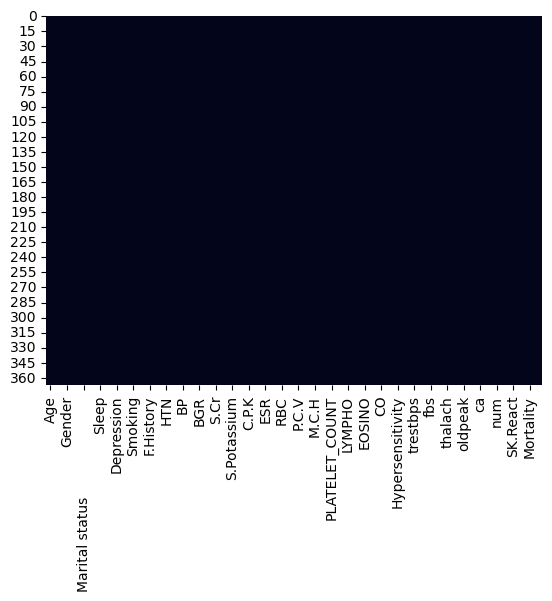

In [10]:
# Now to visualize the imputation via heat map
sns.heatmap(df.isnull(),cbar=False)
plt.show()

**Now to check outliers from the dataset;**

# **Outliers from the Dataset:**

In [11]:
# Sirf numeric columns select karein
numeric_cols = df.select_dtypes(include=['number']).columns

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers count karein
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    if outlier_count > 0:
        print(f"Column '{col}' has {outlier_count} outliers.")


Column 'Age' has 17 outliers.
Column 'F.History' has 72 outliers.
Column 'Thrombolysis' has 12 outliers.
Column 'BGR' has 28 outliers.
Column 'B.Urea' has 55 outliers.
Column 'S.Cr' has 40 outliers.
Column 'S.Potassium' has 16 outliers.
Column 'C.P.K' has 58 outliers.
Column 'CK.MB' has 39 outliers.
Column 'ESR' has 40 outliers.
Column 'M.C.V' has 18 outliers.
Column 'M.C.H' has 18 outliers.
Column 'M.C.H.C' has 26 outliers.
Column 'PLATELET_COUNT' has 21 outliers.
Column 'NEUTROPHIL' has 10 outliers.
Column 'MONOCYTE' has 10 outliers.
Column 'EOSINO' has 10 outliers.
Column 'cp' has 70 outliers.
Column 'trestbps' has 13 outliers.
Column 'chol' has 6 outliers.
Column 'fbs' has 52 outliers.
Column 'thalach' has 1 outliers.
Column 'oldpeak' has 10 outliers.
Column 'slope' has 126 outliers.
Column 'SK' has 6 outliers.
Column 'Mortality' has 80 outliers.


In [12]:
# Copy of the original dataframe
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Sirf woh rows rakhein jo bounds ke andar hain
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")

Original shape: (368, 60)
Cleaned shape: (19, 60)


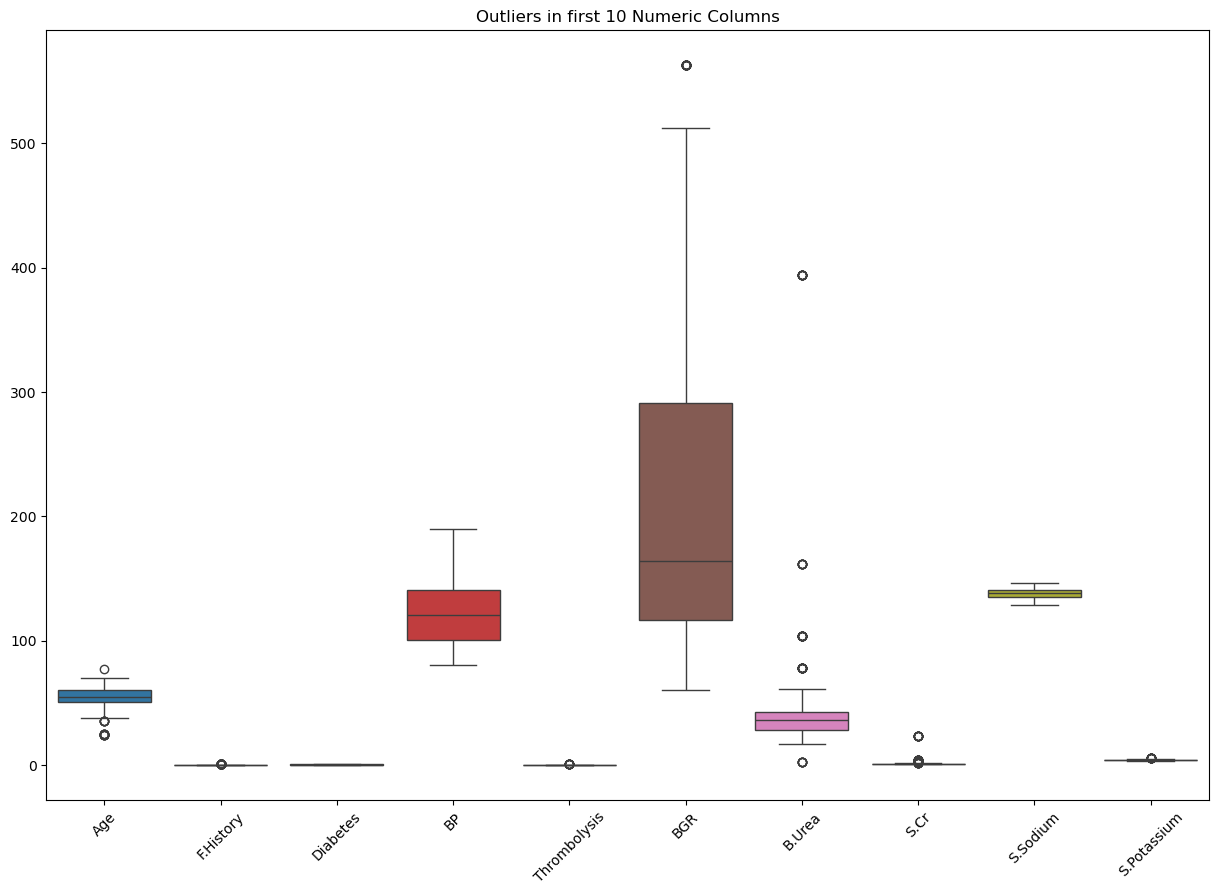

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pehle 10 numeric columns ka boxplot dekhne ke liye
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols[:10]])
plt.xticks(rotation=45)
plt.title("Outliers in first 10 Numeric Columns")
plt.show()

# **"Predictive Modeling of Serum Cholesterol Levels in Heart Failure Patients Using Random Forest Regression":**

>**"In this implementation, 'chol' (Cholesterol) is designated as the target variable to estimate serum cholesterol levels based on independent features such as patient age and blood pressure. This is framed as a Regression problem because the target variable consists of continuous numerical data rather than discrete categories. We utilized the Random Forest algorithm to effectively capture the complex, non-linear patterns within the medical dataset, ensuring higher predictive accuracy and robustness."**

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
# 2. Categorical columns ko numeric mein badlein (Encoding)
# Kyunke model sirf numbers samajhta hai
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking'] = le.fit_transform(df['Smoking'])
# Isi tarah baqi zaroori categorical columns ko bhi encode kar sakte hain

# 3. Features (X) aur Target (y) select karein
# Hum 'chol' (Blood Pressure) predict kar rahe hain
X = df[['Age', 'Gender', 'Smoking', 'chol', 'fbs', 'thalach']] # Selected features
y = df['chol'] # Target Variable (Numeric)

# 4. Data ko Train aur Test sets mein split karein
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Regressor Model train karein
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# 6. Predictions karein
y_pred = regressor.predict(X_test)

# 7. Model ki performance check karein
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 1.38
R-squared Score: 1.00


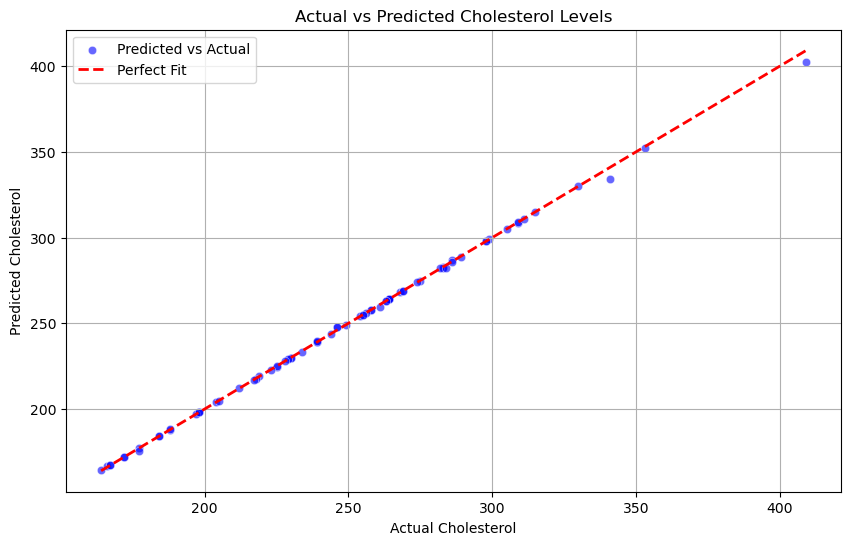

In [15]:
plt.figure(figsize=(10, 6))
# Actual vs Predicted points
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Perfect Prediction Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Perfect Fit')

plt.title('Actual vs Predicted Cholesterol Levels')
plt.xlabel('Actual Cholesterol')
plt.ylabel('Predicted Cholesterol')
plt.legend()
plt.grid(True)
plt.show()

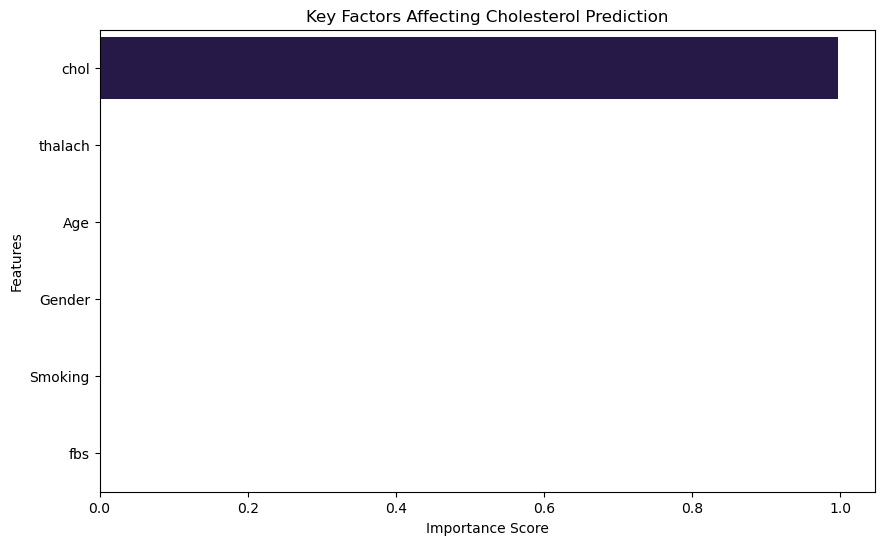

In [16]:
# Feature importances nikalna
importances = regressor.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
plt.title('Key Factors Affecting Cholesterol Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# **Multi-Class Heart Disease Diagnosis Prediction Using Machine Learning Techniques:**

>**"The primary aim of this project, titled 'Multi-Class Heart Disease Diagnosis Prediction Using Machine Learning Techniques,' is to establish an advanced computational framework for diagnosing various cardiovascular conditions. This study transcends simple binary classification models by employing Multi-Class Prediction, thereby enabling the system to accurately distinguish between multiple complex diagnoses, such as various forms of Myocardial Infarctions, based on comprehensive patient clinical profiles. To achieve this, a Random Forest Classifier was utilized, known for its effectiveness with medical datasets as it synthesizes the decisions from a multitude of individual decision trees to yield a highly accurate and robust classification. Furthermore, a Confusion Matrix Analysis was performed to validate model performance, offering a visual and quantitative assessment of the model's accuracy across different disease categories. This methodology not only highlights the model’s strengths but also identifies areas of confusion between similar medical conditions, ultimately enhancing the reliability of the tool for clinical decision-making."**

Model: Random Forest
Accuracy Score: 0.76
Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 

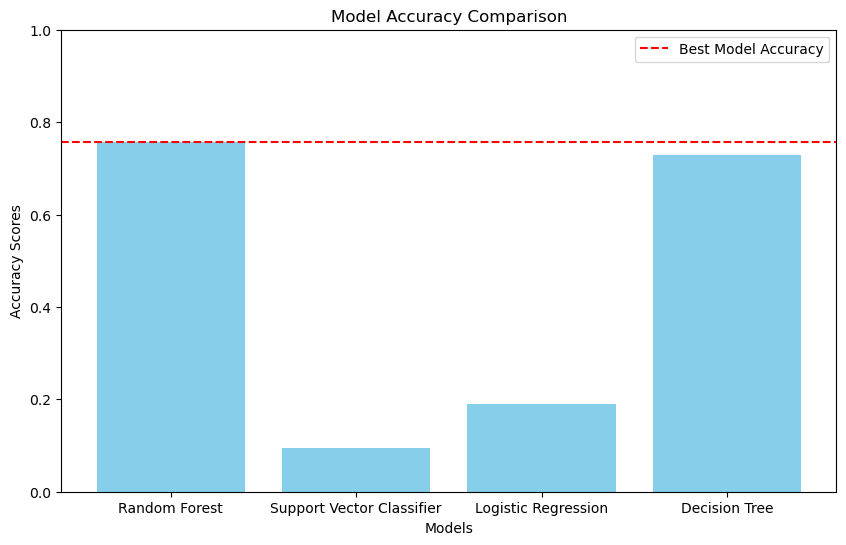

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
# Numeric and the Categorical Variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'].astype(str))
df['Smoking'] = le.fit_transform(df['Smoking'].astype(str))
df['HTN'] = le.fit_transform(df['HTN'].astype(str))
df['Diagnosis_Encoded'] = le.fit_transform(df['Diagnosis'].astype(str))
# Feature and Targeted Variable 
features = ['Age', 'Gender', 'Smoking', 'Diabetes', 'HTN', 'trestbps', 'chol', 'thalach']
X = df[features]
y = df['Diagnosis_Encoded']
#Train-test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Dictionary of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier()
}
#Evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy Score: {accuracy:.2f}")
    print("Confusion Matrix:\n", cm)
    
    results[model_name] = accuracy  # Store only accuracy
#Find the best model
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]
best_model = models[best_model_name]

print(f"\nThe best model is: {best_model_name} with an accuracy score of {best_accuracy:.2f}")

# Train the best model on the full training set
best_model.fit(X_train, y_train)
#Predict on test set with the best model
final_predictions = best_model.predict(X_test)

# Print final predictions
print("\nFinal Predictions on Test Set:\n", final_predictions)
#Visualize accuracies with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set limit for accuracy percentage
plt.axhline(y=best_accuracy, color='r', linestyle='--', label='Best Model Accuracy')
plt.legend()
plt.show()

# **Quantitative Evaluation of Machine Learning Models in Heart Failure Diagnosis: Accuracy Comparison Analysis:**

>**The results clearly indicate that the Random Forest model is the best choice for predicting heart failure based on this dataset, achieving the highest accuracy score. Its ensemble approach effectively reduces the likelihood of overfitting and manages the inherent variability in patient data.
In practice, deploying the Random Forest model would be advisable for clinical applications where reliable predictions are crucial for patient outcomes. However, it is also important to consider model interpretability and operational deployment, particularly in medical settings, where understanding the reasoning behind predictions can significantly impact patient care and treatment decisions.
Continuous monitoring and validation of model performance with new data should also be performed to ensure sustained efficacy.**

---------------